In [2]:
import pandas as pd

### 1. Dataset - 10 years worth of data from the Meetings in Parliament
DATA on What has been said in Parliament the past 10 years

Loading the data:

In [3]:
climate = pd.read_csv("scored_v2/ft_meetings_climate_all_2.1.csv")
non_climate = pd.read_csv("scored_v2/ft_meetings_non_climate_all_2.1.csv")
frames = [climate, non_climate]
full = pd.concat(frames)


Cleaning the Index

In [4]:
full['date'] = pd.to_datetime(full['date'])
full.reset_index(drop=True, inplace=True)
full.drop(columns=['index', 'Unnamed: 0'], inplace=True)


In [5]:
#full.to_csv("dk_parliament_data_2.1.csv")

### Grouping climate quotes 

In this section the grouping of the different climate quotes are made by party over time, by day, month and year. The respective outputs are converted into Json vfile formats

In [105]:
climate = full[full['y_pred']=='climate']

In [106]:
#By Year
climate = climate.groupby([climate['date'].dt.strftime('%Y'), 'party'])['politician'].count().reset_index()

#Uncomment to get by month By Month 
#climate = climate.groupby([climate['date'].dt.strftime('%B %Y'), 'party'])['politician'].count().reset_index()

In [131]:
#Uncomment to get by Year
climate.date = climate.date.apply(lambda x: "January " + x)

In [133]:
climate['p']  = climate['party'].apply(lambda x: x.strip("()"))

In [134]:
climate

,date,party,politician,p
0,January 2012,(DF),7,DF
1,January 2012,(EL),14,EL
2,January 2012,(JF),1,JF
3,January 2012,(KF),1,KF
4,January 2012,(LA),17,LA
...,...,...,...,...
126,January 2021,(V),76,V
127,January 2021,Bek,1,Bek
128,January 2021,Jørgensen,1,Jørgensen
129,January 2021,Krag,1,Krag


In [135]:
fc = climate[['politician', 'p', 'date']]

In [136]:
def grouping(val):
    
    dict = {.20:'_1',
            .40:'_2',
            .60:'_3',
            .80:'_4',
            1.0:'_5'}
    
    for i in [.20, .40, .60, .80, 1.0]:
        if val <= fc.quantile(i)[0]: 
            return dict[i]

In [138]:
fc['quote_level'] = fc['politician'].apply(lambda x: grouping(x))

In [139]:
fc

,politician,p,date,quote_level
0,7,DF,January 2012,_2
1,14,EL,January 2012,_2
2,1,JF,January 2012,_1
3,1,KF,January 2012,_1
4,17,LA,January 2012,_2
...,...,...,...,...
126,76,V,January 2021,_4
127,1,Bek,January 2021,_1
128,1,Jørgensen,January 2021,_1
129,1,Krag,January 2021,_1


In [140]:
#uncomment to get by year or month
fc['date'] = fc['date'].apply(lambda x: str(x))


#uncomment to get for by day
#fc['date'] = fc['date'].apply(lambda x: str(x).split(" ")[0])

In [141]:
fc.rename({'p':'party'}, axis=1, inplace=True)

In [142]:
#uncomment to get by year/month
view = fc


,politician,party,date,quote_level
0,7,DF,January 2012,_2
1,14,EL,January 2012,_2
2,1,JF,January 2012,_1
3,1,KF,January 2012,_1
4,17,LA,January 2012,_2
...,...,...,...,...
126,76,V,January 2021,_4
127,1,Bek,January 2021,_1
128,1,Jørgensen,January 2021,_1
129,1,Krag,January 2021,_1


In [143]:
#Uncomment to get by day preprocessing and data preparation.

# view = fc.groupby(['date', 'party']).count()

# view = view.reset_index()

# view['quote_level'] = view['politician'].apply(lambda x: "_"+str(x) if x < 5 else "_5")

In [1]:
#The final format should follow the following structure: (just with party on the content and ClassName with _1 the level of quotes)

[{"id":0, "className": "S", "content": "Henrik Dam Krist", "start": "2021-10-04", "type":"point"}
 ]

[{'id': 0,
  'className': 'S',
  'content': 'Henrik Dam Krist',
  'start': '2021-10-04',
  'type': 'point'}]

In [146]:
def reformat(x):
    lst = []
    dict = {"id":x.index, "className": x.party, "content": x.politician, "start": x.date, "type":"point"}
    lst.append(dict)
    return lst
    

In [164]:
lst = []

#Uncomment for format 1 
for index, x in view.T.iteritems():
    dict = {"id":index, "className": x.party, "content": x.quote_level, "start": x.date, "type":"point"}
    lst.append(dict)
    

#Uncomment for format 2
# for index, x in view.T.iteritems():
#     dict = {"id":index, "className": x.quote_level, "content": x.party, "start": x.date, "type":"point"}
#     lst.append(dict)

In [165]:
#See result:
lst

[{'id': 0,
  'className': 'DF',
  'content': '_2',
  'start': 'January 2012',
  'type': 'point'},
 {'id': 1,
  'className': 'EL',
  'content': '_2',
  'start': 'January 2012',
  'type': 'point'},
 {'id': 2,
  'className': 'JF',
  'content': '_1',
  'start': 'January 2012',
  'type': 'point'},
 {'id': 3,
  'className': 'KF',
  'content': '_1',
  'start': 'January 2012',
  'type': 'point'},
 {'id': 4,
  'className': 'LA',
  'content': '_2',
  'start': 'January 2012',
  'type': 'point'},
 {'id': 5,
  'className': 'RV',
  'content': '_2',
  'start': 'January 2012',
  'type': 'point'},
 {'id': 6,
  'className': 'S',
  'content': '_2',
  'start': 'January 2012',
  'type': 'point'},
 {'id': 7,
  'className': 'SF',
  'content': '_2',
  'start': 'January 2012',
  'type': 'point'},
 {'id': 8,
  'className': 'V',
  'content': '_2',
  'start': 'January 2012',
  'type': 'point'},
 {'id': 9,
  'className': 'Dyhr',
  'content': '_1',
  'start': 'January 2012',
  'type': 'point'},
 {'id': 10,
  'class

In [166]:
import json
#Conversion to Json
name = "count_quotes_5cat_peryear1.2.json"
jsonString = json.dumps(lst)
jsonFile = open(name, "w")
jsonFile.write(jsonString)
jsonFile.close()


In [ ]:
#And we're done!

## Visualizing the Temporal dynamics for all climate quotes

In [152]:
full['climate'] = full['y_pred'].apply(lambda x: 1 if x=="climate" else 0)
full['non-climate'] = full['y_pred'].apply(lambda x: 1 if x=="non-climate" else 0)


In [153]:
yearly = full.groupby(full['date'].dt.to_period('Y')).agg({'climate': 'sum', 'non-climate':'sum'})
yearly['percentage_climate'] = yearly.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)
view2 = yearly.drop(columns=['climate', 'non-climate'])

In [154]:
type(view2)

view2.to_json("view2.json")

### To visualize the temporal dynamics for climate Quotes

<AxesSubplot:title={'center':'Overall Distribution of Climate Quotes'}, xlabel='date', ylabel='% climate quotes'>

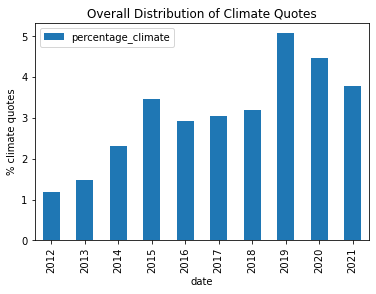

In [155]:
view2.plot(kind='bar', title='Overall Distribution of Climate Quotes', ylabel="% climate quotes")

Maybe interesting to see how these differ between parties?

In [156]:
full.party.unique()

array(['(S)', '(V)', '(LA)', '(EL)', '(DF)', '(RV)', '(KF)', '(SF)',
       'Dyhr', '(JF)', '(IA)', '(UFG)', '(SP)', '(ALT)', '(T)', '(SIU)',
       '(NQ)', 'Samuelsen', '(NB)', 'Jørgensen', 'Krag', 'Mortensen',
       'Bek', '(KD)', 'Sohn', 'Bach', 'Gjerskov', 'Søvndal', 'Pedersen',
       'Hækkerup', 'Elbæk', 'Vestager', 'Wammen', 'Poulsen', 'Rasmussen',
       'Kollerup', 'Tesfaye', 'Halsboe-Jørgensen'], dtype=object)

In [157]:
party = '(KD)'

sample = full[full.party == party]

sample['climate'] = sample['y_pred'].apply(lambda x: 1 if x=="climate" else 0)
sample['non-climate'] = sample['y_pred'].apply(lambda x: 1 if x=="non-climate" else 0)

/tmp/ipykernel_1651/4168718830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['climate'] = sample['y_pred'].apply(lambda x: 1 if x=="climate" else 0)
/tmp/ipykernel_1651/4168718830.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['non-climate'] = sample['y_pred'].apply(lambda x: 1 if x=="non-climate" else 0)


In [158]:
yearly = sample.groupby(sample['date'].dt.to_period('Y')).agg({'climate': 'sum', 'non-climate':'sum'})
yearly['percentage_climate'] = yearly.apply(lambda x: (x['climate']/(x['climate']+x['non-climate']))*100, axis=1)
view3 = yearly.drop(columns=['climate', 'non-climate'])

In [159]:
view3

,percentage_climate
date,
2021,1.886792


<AxesSubplot:title={'center':'Overall Distribution of Climate Quotes for the party: (KD)'}, xlabel='date', ylabel='% climate quotes'>

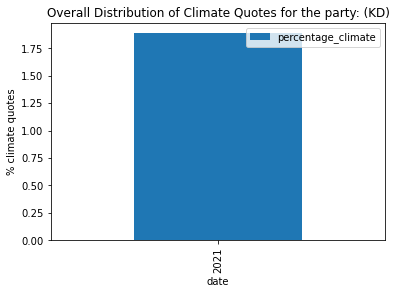

In [160]:
view3.plot(kind='bar', title='Overall Distribution of Climate Quotes for the party: '+party, ylabel="% climate quotes")

In [161]:
view3.to_json(party+"_climate_quotes_distr.json")